In [427]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram


In [429]:
# Choose data characteristiscs
lenght = 400
k = 6
c_std = 1


# Generate synthetic data
X, _ = make_blobs(n_samples=lenght, centers=k, cluster_std=c_std, random_state=0)

# For real data run a piece of code as follows:
'''
file_path = 'insert path here'
X = pd.read_csv(file_path)
'''

"\nfile_path = 'insert path here'\nX = pd.read_csv(file_path)\n"

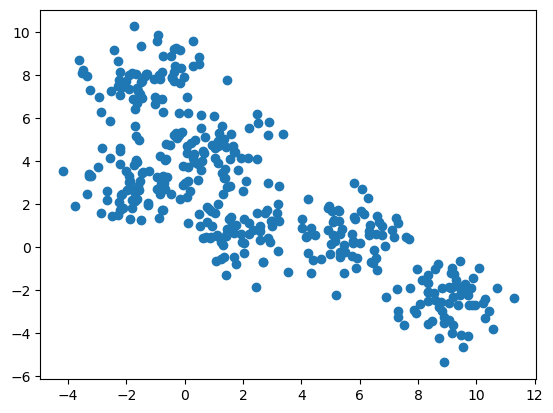

In [431]:
plt.scatter(X[:,0],X[:,1])

In [439]:
# Initialize KMeans with different initialization methods
kmeans_random = KMeans(n_clusters=k, init='random', n_init=1, random_state=0).fit(X)
kmeans_plusplus = KMeans(n_clusters=k, init='k-means++', n_init=1, random_state=0).fit(X)

# Using the same centroids for both Forgy and Random Partition isn't straightforward
# in scikit-learn, so we'll manually initialize centroids for demonstration
np.random.seed(0)
forgy_centroids = X[np.random.choice(X.shape[0], k, replace=False)]
random_partition_labels = np.random.choice(k, X.shape[0])
random_partition_centroids = np.array([X[random_partition_labels == i].mean(axis=0) for i in range(k)])

kmeans_forgy = KMeans(n_clusters=k, init=forgy_centroids, n_init=1, random_state=0).fit(X)
kmeans_random_partition = KMeans(n_clusters=k, init=random_partition_centroids, n_init=1, random_state=0).fit(X)

# Performing Agglomerative Clustering ‘ward’, ‘complete’, ‘average’, ‘single’
agg_cluster_ward = AgglomerativeClustering(n_clusters=k, linkage='ward').fit(X)

agg_cluster_complete = AgglomerativeClustering(n_clusters=k, linkage='complete').fit(X)

agg_cluster_average = AgglomerativeClustering(n_clusters=k, linkage='average').fit(X)

agg_cluster_single = AgglomerativeClustering(n_clusters=k, linkage='single').fit(X)

# DBSCAN clustering
dbs_min_samples = 10

dbscan50 = DBSCAN(eps=0.5, min_samples=dbs_min_samples).fit(X)

dbscan75 = DBSCAN(eps=0.75, min_samples=dbs_min_samples).fit(X)

dbscan100 = DBSCAN(eps=1, min_samples=dbs_min_samples).fit(X)

# Creating a Gaussian Mixture Model
gmm = GaussianMixture(n_components=k, random_state=0).fit(X)
gmm_labels = gmm.predict(X)

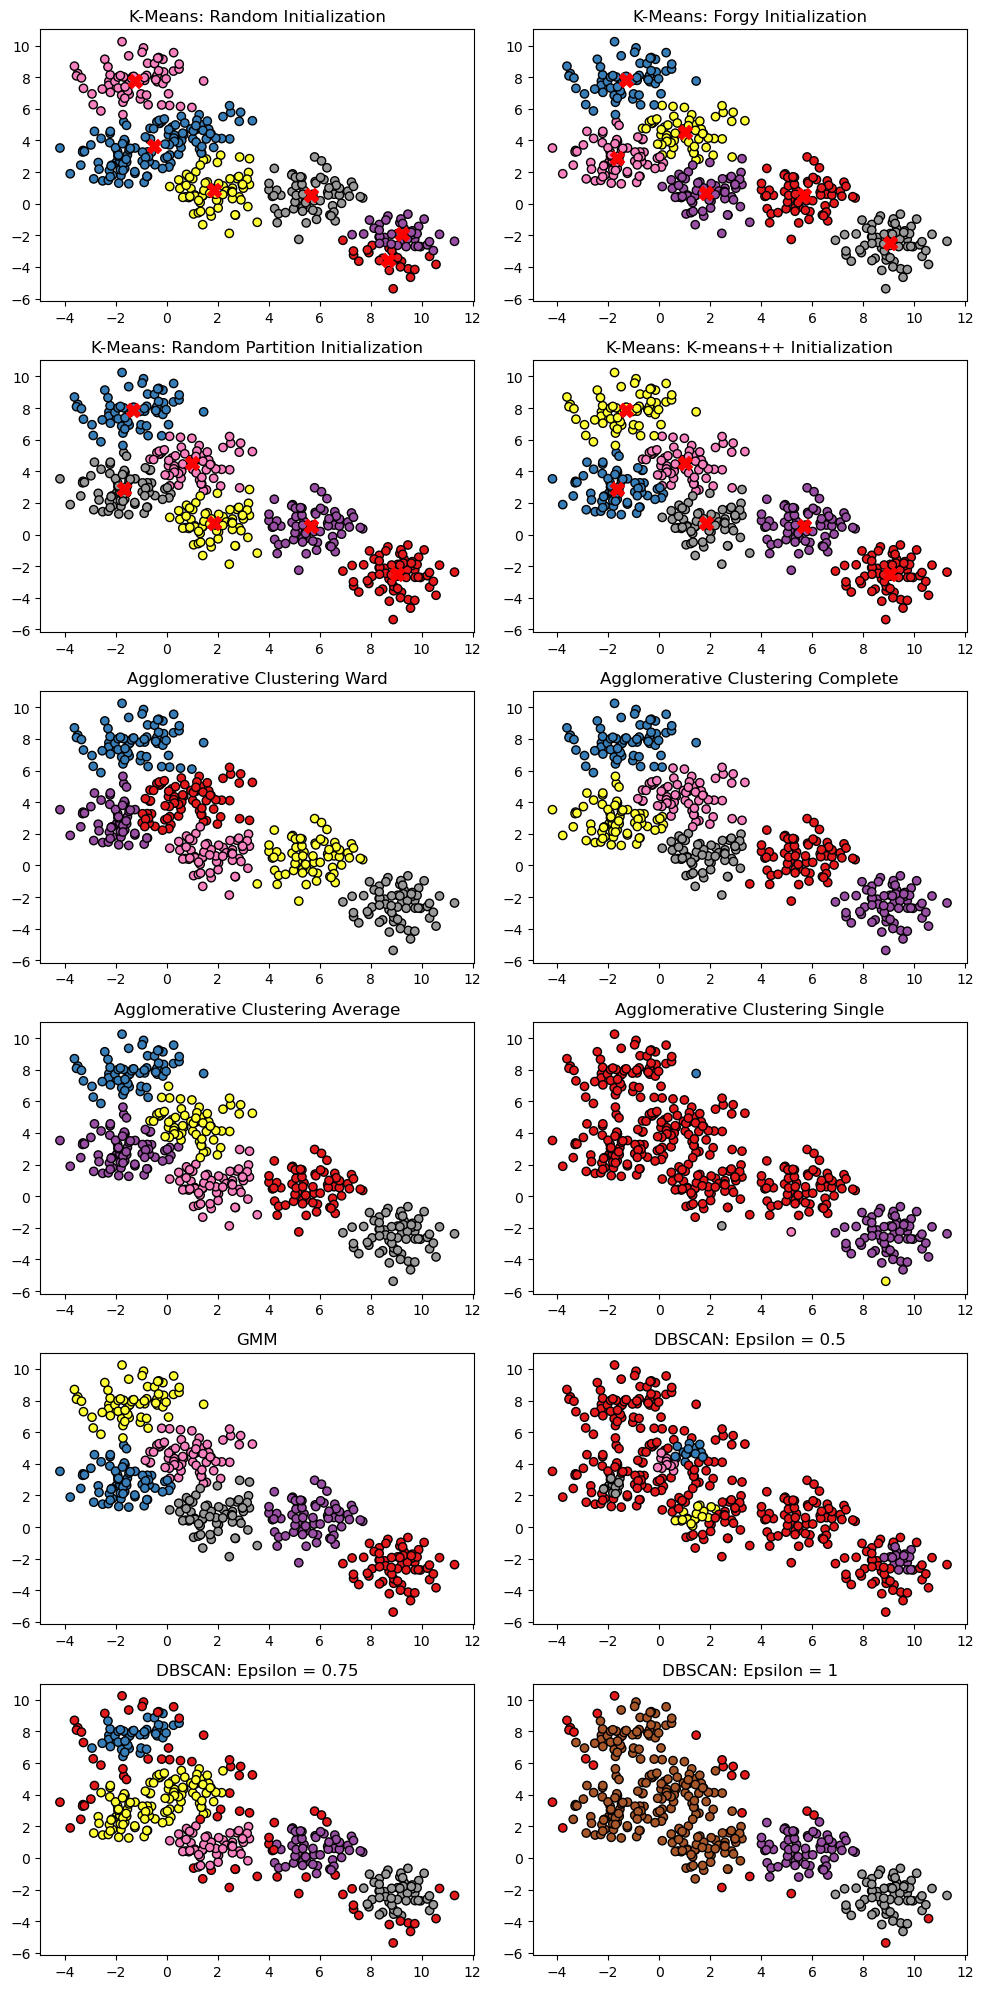

In [453]:
# Plotting the results
fig, axs = plt.subplots(6, 2, figsize=(10, 20),)

color_mapping = 'Set1'

# Random Initialization
axs[0, 0].scatter(X[:, 0], X[:, 1], c=kmeans_random.labels_, cmap=color_mapping, marker='o', edgecolor='k')
axs[0, 0].scatter(kmeans_random.cluster_centers_[:, 0], kmeans_random.cluster_centers_[:, 1], s=100, c='red', marker='X')
axs[0, 0].set_title('K-Means: Random Initialization')

# Forgy Initialization
axs[0, 1].scatter(X[:, 0], X[:, 1], c=kmeans_forgy.labels_, cmap=color_mapping, marker='o', edgecolor='k')
axs[0, 1].scatter(kmeans_forgy.cluster_centers_[:, 0], kmeans_forgy.cluster_centers_[:, 1], s=100, c='red', marker='X')
axs[0, 1].set_title('K-Means: Forgy Initialization')

# Random Partition Initialization
axs[1, 0].scatter(X[:, 0], X[:, 1], c=kmeans_random_partition.labels_, cmap=color_mapping, marker='o', edgecolor='k')
axs[1, 0].scatter(kmeans_random_partition.cluster_centers_[:, 0], kmeans_random_partition.cluster_centers_[:, 1], s=100, c='red', marker='X')
axs[1, 0].set_title('K-Means: Random Partition Initialization')

# K-means++ Initialization
axs[1, 1].scatter(X[:, 0], X[:, 1], c=kmeans_plusplus.labels_, cmap=color_mapping, marker='o', edgecolor='k')
axs[1, 1].scatter(kmeans_plusplus.cluster_centers_[:, 0], kmeans_plusplus.cluster_centers_[:, 1], s=100, c='red', marker='X')
axs[1, 1].set_title('K-Means: K-means++ Initialization')

# Agglomerative Clustering
axs[2, 0].scatter(X[:, 0], X[:, 1], c=agg_cluster_ward.labels_, cmap=color_mapping, marker='o', edgecolor='k')
axs[2, 0].set_title('Agglomerative Clustering Ward')

# Agglomerative Clustering
axs[2, 1].scatter(X[:, 0], X[:, 1], c=agg_cluster_complete.labels_, cmap=color_mapping, marker='o', edgecolor='k')
axs[2, 1].set_title('Agglomerative Clustering Complete')

# Agglomerative Clustering
axs[3, 0].scatter(X[:, 0], X[:, 1], c=agg_cluster_average.labels_, cmap=color_mapping, marker='o', edgecolor='k')
axs[3, 0].set_title('Agglomerative Clustering Average')

# Agglomerative Clustering
axs[3, 1].scatter(X[:, 0], X[:, 1], c=agg_cluster_single.labels_, cmap=color_mapping, marker='o', edgecolor='k')
axs[3, 1].set_title('Agglomerative Clustering Single')

#GMM
axs[4, 0].scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap=color_mapping, marker='o', edgecolor='k')
axs[4, 0].set_title('GMM')

# DBSCAN
axs[4, 1].scatter(X[:, 0], X[:, 1], c=dbscan50.labels_, cmap=color_mapping, marker='o', edgecolor='k')
axs[4, 1].set_title('DBSCAN: Epsilon = 0.5')

axs[5, 0].scatter(X[:, 0], X[:, 1], c=dbscan75.labels_, cmap=color_mapping, marker='o', edgecolor='k')
axs[5, 0].set_title('DBSCAN: Epsilon = 0.75')

axs[5, 1].scatter(X[:, 0], X[:, 1], c=dbscan100.labels_, cmap=color_mapping, marker='o', edgecolor='k')
axs[5, 1].set_title('DBSCAN: Epsilon = 1')


fig.tight_layout()
plt.show()
